In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
df = pd.read_csv('Cardiotocographic.csv')

In [2]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
import pandas as pd

# Load the data into a DataFrame
data = pd.read_csv("Cardiotocographic.csv")  # Replace "your_data_file.csv" with the path to your CSV file

# Handle missing values
# Option 1: Imputation (fill missing values with mean)
data.fillna(data.mean(), inplace=True)

# Option 2: Deletion (remove rows with missing values)
# data.dropna(inplace=True)

# Identify and correct data types
data['NSP'] = data['NSP'].astype(int)  # Convert 'NSP' column to integer type

# Detect outliers
# Assuming 'Width' column as an example
Q1 = data['Width'].quantile(0.25)
Q3 = data['Width'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['Width'] < lower_bound) | (data['Width'] > upper_bound)]
print("Outliers in 'Width' column:")
print(outliers)

# Further processing or analysis can be performed as needed

# Save the cleaned data to a new CSV file
data.to_csv("updated_data.csv", index=False)


Outliers in 'Width' column:
              LB        AC        FM        UC        DL   DS        DP  ASTV  \
54    147.816574  0.000000  0.002502  0.000000 -0.000059  0.0  0.000000  70.0   
64    141.000000  0.001282  0.000000  0.005128  0.000000  0.0  0.000000  25.0   
120   123.000000  0.000000  0.000000  0.005004  0.004170  0.0  0.000000  47.0   
389   129.000000  0.008264  0.053719  0.002066  0.000000  0.0  0.000000  37.0   
704   130.030418  0.000000  0.352941  0.000000  0.000000  0.0  0.005348  80.0   
829   152.000000  0.000000  0.000000  0.003854  0.000963  0.0  0.000000  58.0   
860   142.000000  0.001471  0.001542  0.004412  0.000000  0.0  0.000000  39.0   
1096  123.000000  0.017341  0.000000  0.001927  0.000000  0.0  0.000000  24.0   
1273  115.000000  0.007032  0.000000  0.005626  0.000000  0.0  0.000000  20.0   
1320  128.000000  0.006519  0.007823  0.005215  0.005215  0.0  0.001304  19.0   

      MSTV       ALTV  MLTV  Width  Tendency  NSP  
54     0.3  69.000000   5.1 

## Description

In [18]:
# Statistical summary for each variable
summary = data.describe()

# Print the summary
print(summary)


                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.214328     0.004370     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63

In [19]:
# Print the summary
print('Fetal Heart Rate LB - The fetal Heart rate is approximately 133 per minute but the standard deviation is 11.21 per minutes',
      'Accelaration AC - the maean value of accelaration value is very small -0.0032', 'overall the data has used fetal heart rate well being and abnormalities')


Fetal Heart Rate LB - The fetal Heart rate is approximately 133 per minute but the standard deviation is 11.21 per minutes Accelaration AC - the maean value of accelaration value is very small -0.0032 overall the data has used fetal heart rate well being and abnormalities


## Data Visualization:

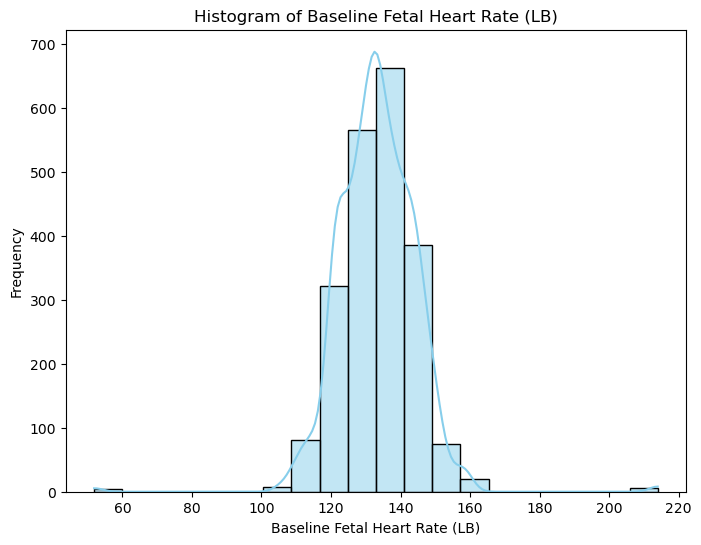

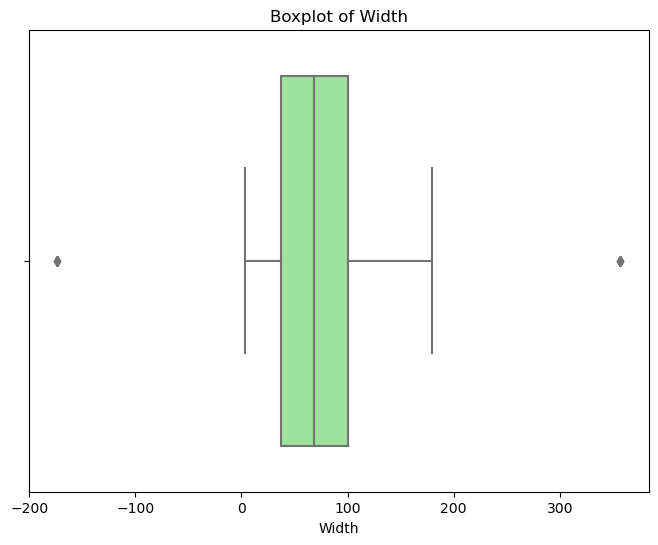

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for 'LB' (Baseline Fetal Heart Rate)
plt.figure(figsize=(8, 6))
sns.histplot(data['LB'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Baseline Fetal Heart Rate (LB)')
plt.xlabel('Baseline Fetal Heart Rate (LB)')
plt.ylabel('Frequency')
plt.show()

# Boxplot for 'Width'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Width'], color='lightgreen')
plt.title('Boxplot of Width')
plt.xlabel('Width')
plt.show()


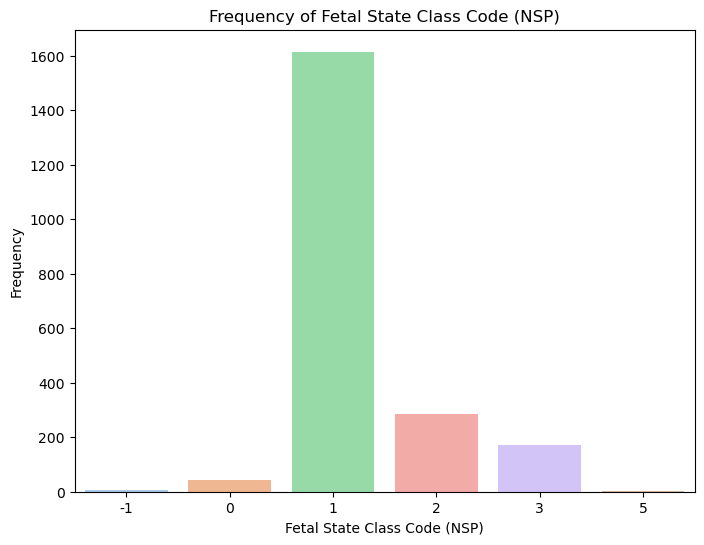

In [21]:
# Bar chart for 'NSP' (Fetal State Class Code)
plt.figure(figsize=(8, 6))
sns.countplot(x=data['NSP'], palette='pastel')
plt.title('Frequency of Fetal State Class Code (NSP)')
plt.xlabel('Fetal State Class Code (NSP)')
plt.ylabel('Frequency')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


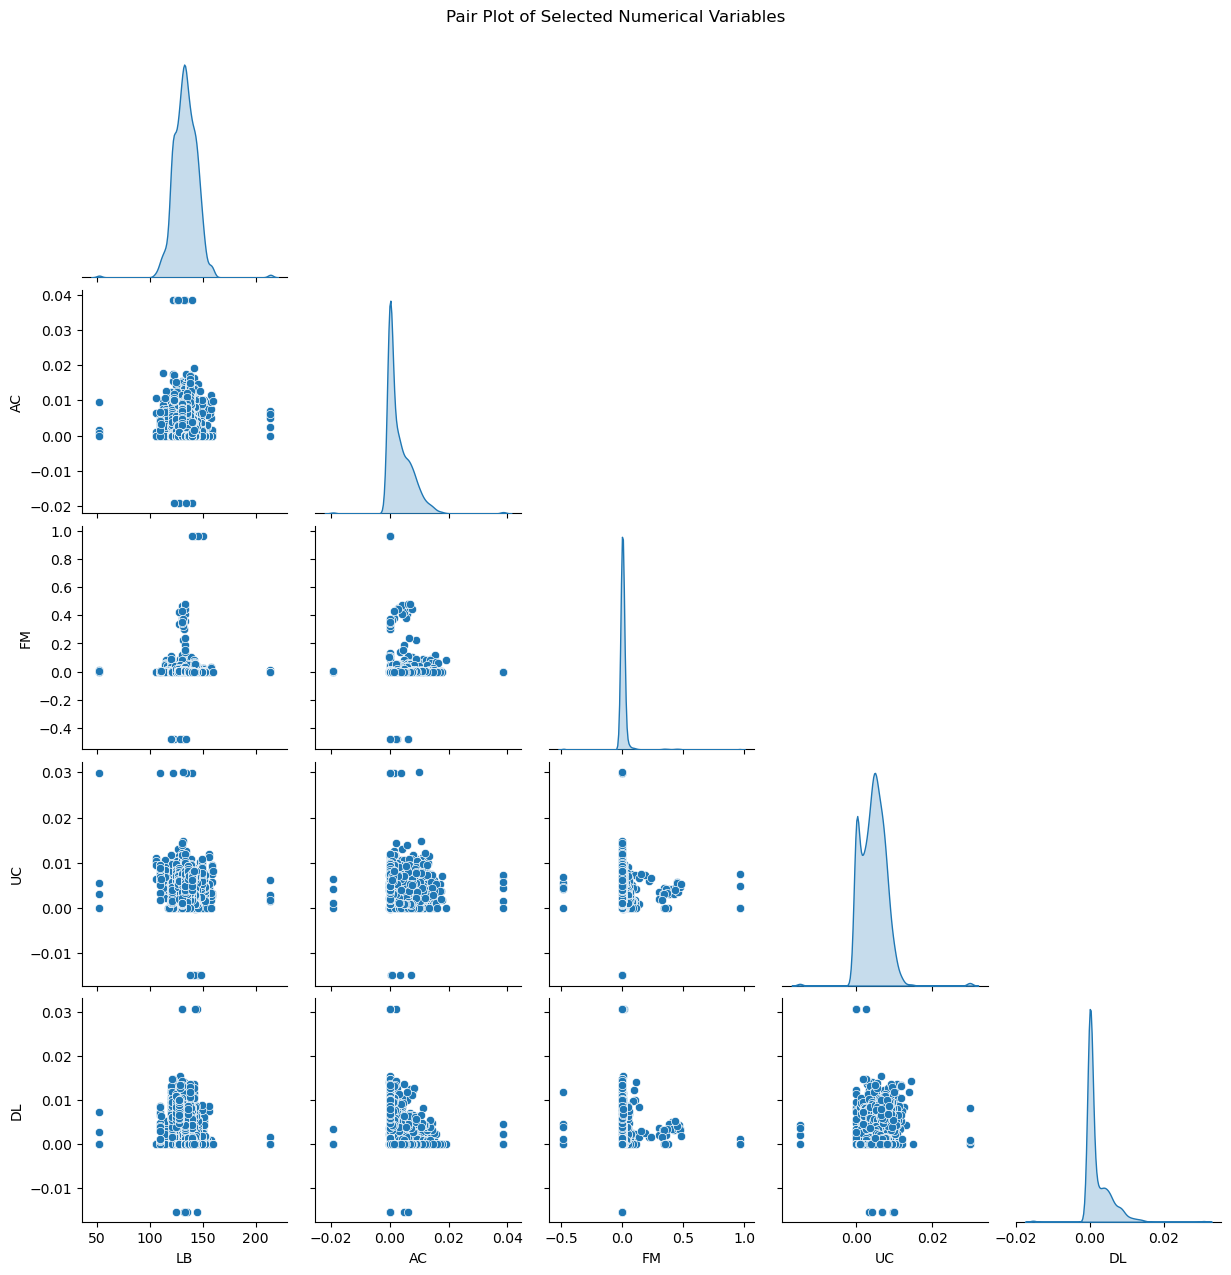

In [29]:
# Pair plot
sns.pairplot(data[['LB', 'AC', 'FM', 'UC', 'DL']], diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Selected Numerical Variables', y=1.02)
plt.show()




## Correlation

In [42]:

correlation_matrix = data.corr()
print(correlation_matrix)

                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.063830  0.018777 -0.166570 -0.126959 -0.005438   
AC       -0.063830  1.000000  0.009433  0.072012 -0.093507 -0.033623   
FM        0.018777  0.009433  1.000000 -0.053226  0.009718  0.029901   
UC       -0.166570  0.072012 -0.053226  1.000000  0.190128 -0.006937   
DL       -0.126959 -0.093507  0.009718  0.190128  1.000000  0.058625   
DS       -0.005438 -0.033623  0.029901 -0.006937  0.058625  1.000000   
DP       -0.047724 -0.084590  0.121284  0.070658  0.145425  0.004285   
ASTV      0.242625 -0.231103 -0.032691 -0.181161 -0.069361  0.008452   
MSTV     -0.170473  0.134168  0.017055  0.189406  0.410102  0.016163   
ALTV      0.210728 -0.271390 -0.011936 -0.227304 -0.186967 -0.004398   
MLTV     -0.003457 -0.106529 -0.006237 -0.049460 -0.165750  0.034349   
Width    -0.118425  0.238436  0.097213  0.107397  0.410031  0.040832   
Tendency  0.236864  0.032481 -0.018339 -0.066610 -0.023569 -0.01

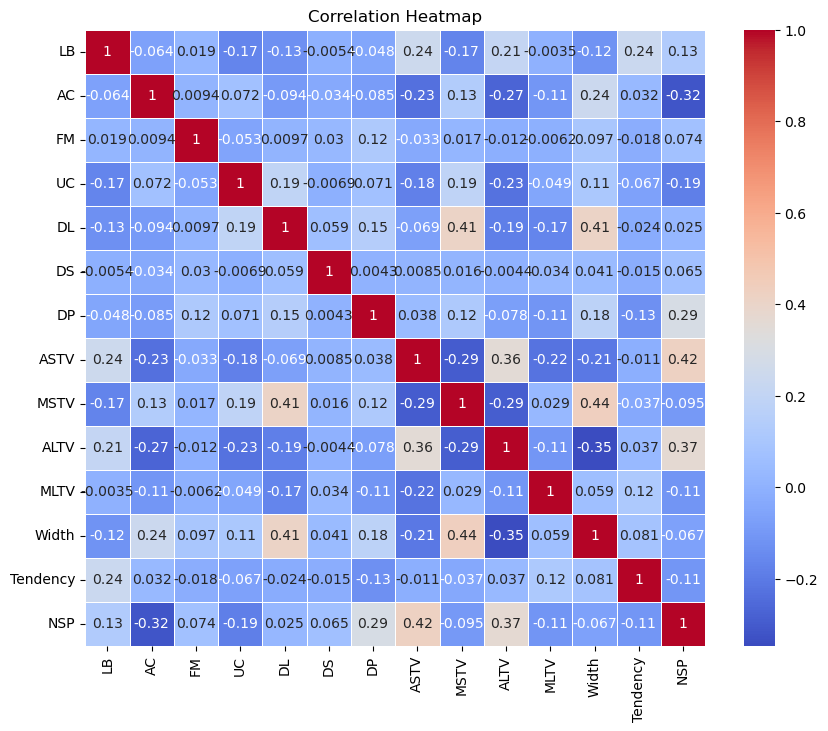

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### Trendline

             LB  FM
0     51.842487   1
1     52.000000   2
2     52.188547   1
3    106.000000   1
4    106.001581   1
..          ...  ..
148  158.000000   5
149  158.757666   1
150  159.000000   1
151  160.000000   1
152  214.000000   3

[153 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:                     FM   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                  0.006472
Date:                Thu, 13 Jun 2024   Prob (F-statistic):              0.936
Time:                        21:54:08   Log-Likelihood:                -608.48
No. Observations:                 153   AIC:                             1221.
Df Residuals:                     151   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:         

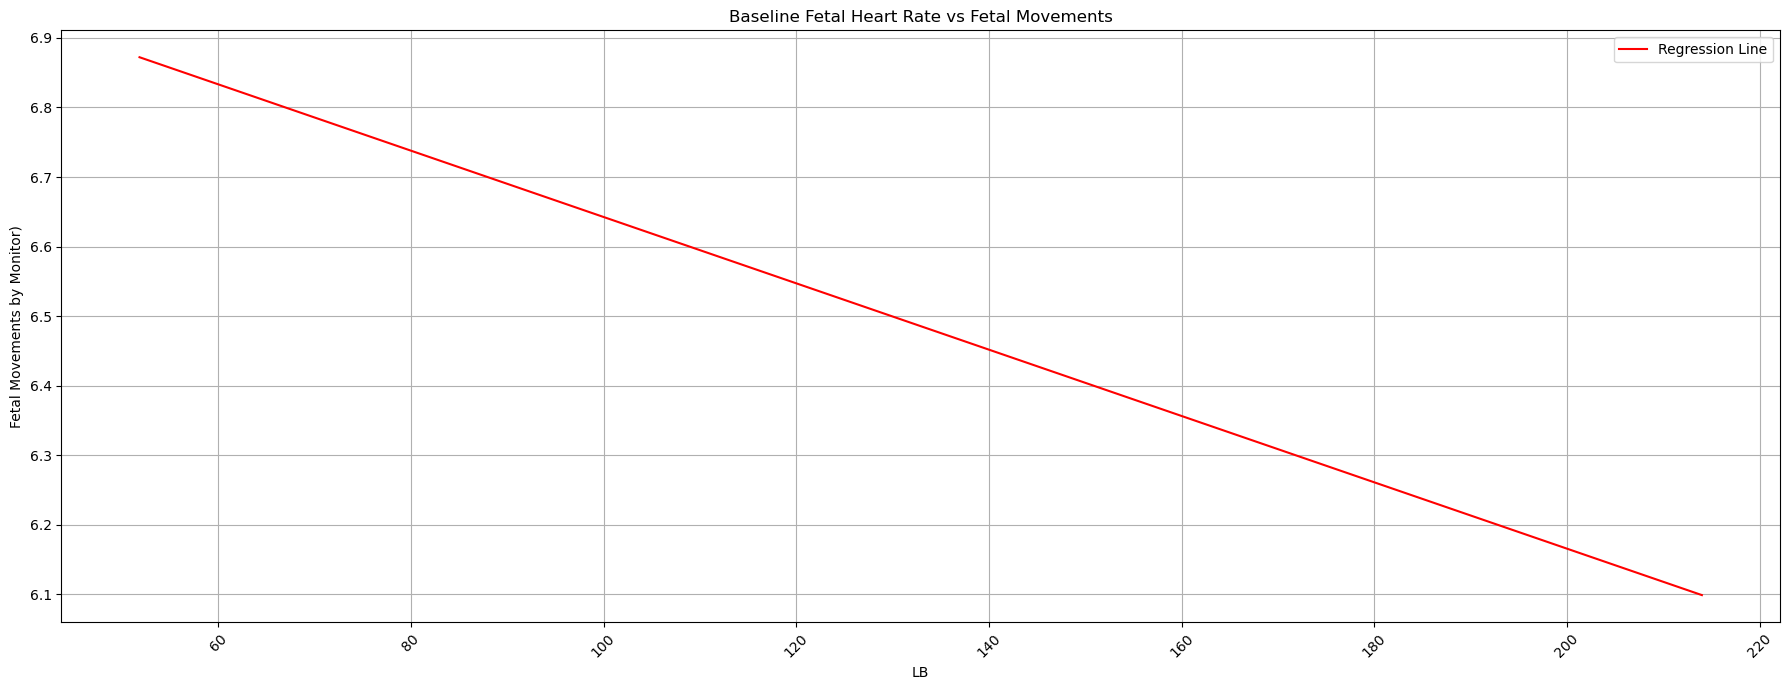

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming your DataFrame is named 'df'
datevsenquiry = df.groupby('LB')['FM'].nunique().reset_index()  # Group by LB and count unique FMs
print(datevsenquiry)
# Linear Regression
X = sm.add_constant(datevsenquiry['LB'])  # Add constant term for intercept
y = datevsenquiry['FM']  # Target variable


   
model = sm.OLS(y, X)  # Ordinary Least Squares model
results = model.fit()

# Print regression model summary
print(results.summary())

# Predicted values for the regression line
predicted_values = results.predict(X)

# Plotting with enhanced clarity
plt.figure(figsize=(18, 7))


plt.plot(X['LB'], predicted_values, label='Regression Line', color='red')

plt.xlabel('LB')  # Set x-label depending on time-series
plt.ylabel('Fetal Movements by Monitor)')
plt.title('Baseline Fetal Heart Rate vs Fetal Movements')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()
